In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

# Exploratory data analysis

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Check for null values

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

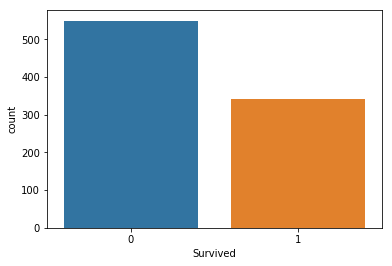

In [7]:
sns.countplot(train['Survived'])

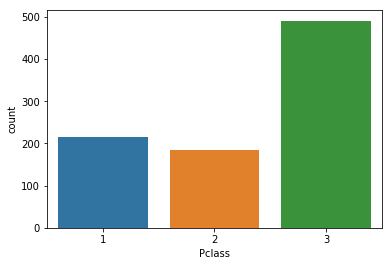

In [8]:
sns.countplot(train['Pclass'])

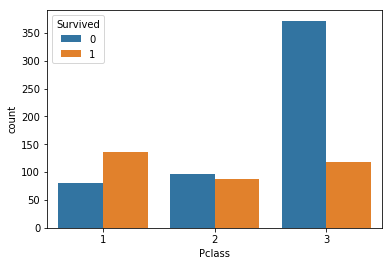

In [9]:
sns.countplot(train['Pclass'], hue=train['Survived'])

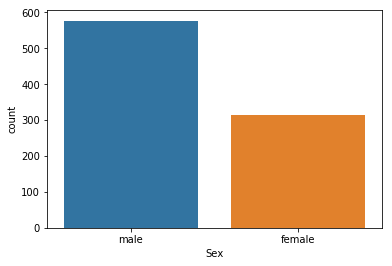

In [10]:
sns.countplot(train['Sex'])

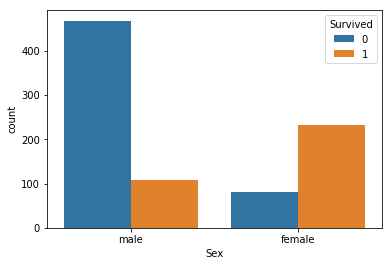

In [11]:
sns.countplot(train['Sex'], hue=train['Survived'])

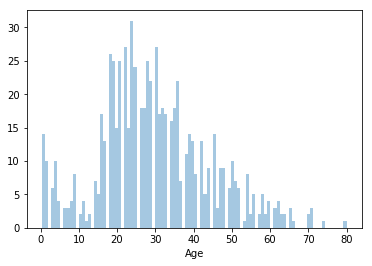

In [12]:
sns.distplot(train['Age'].dropna(), kde=False, bins=100)

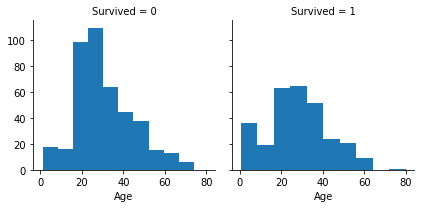

In [13]:
age = train[['Age', 'Survived']].dropna()
g = sns.FacetGrid(age, col='Survived')
g = g.map(plt.hist, 'Age')

In [14]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

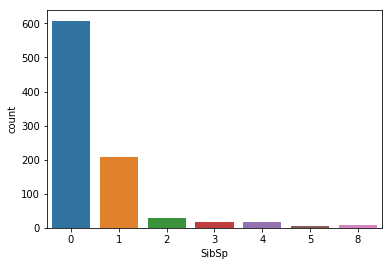

In [15]:
sns.countplot(train['SibSp'])

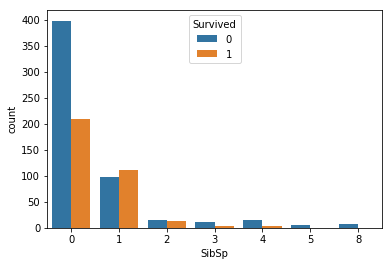

In [16]:
sns.countplot(train['SibSp'], hue=train['Survived'])

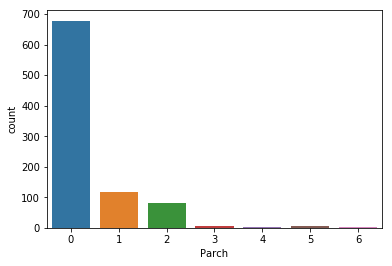

In [17]:
sns.countplot(train['Parch'])

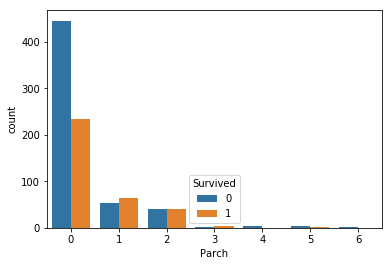

In [18]:
sns.countplot(train['Parch'], hue=train['Survived'])

In [19]:
train['Ticket'].nunique()

681

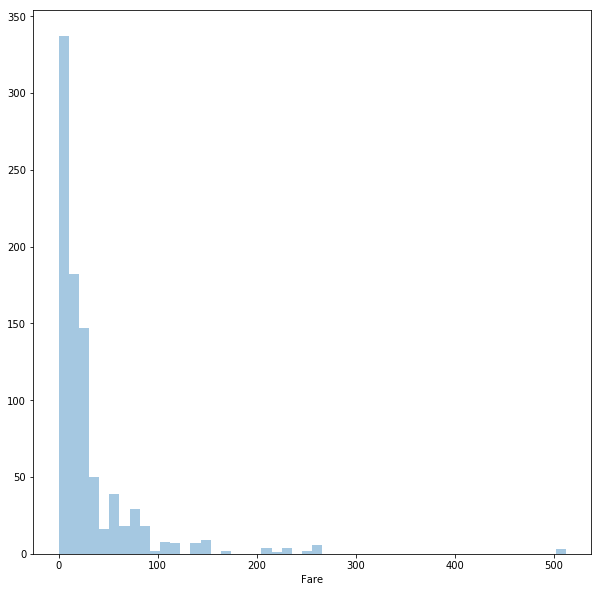

In [20]:
plt.figure(figsize=(10,10))
sns.distplot(train['Fare'], kde=False)

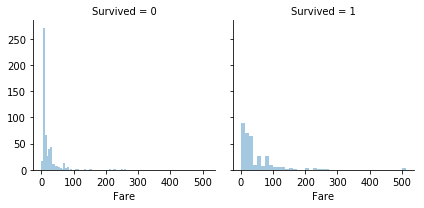

In [21]:
age = train[['Fare', 'Survived']].dropna()
g = sns.FacetGrid(age, col='Survived')
g = g.map(sns.distplot, 'Fare', kde=False)

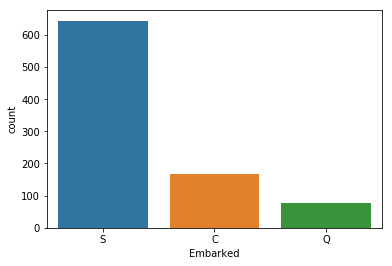

In [22]:
sns.countplot(train['Embarked'])

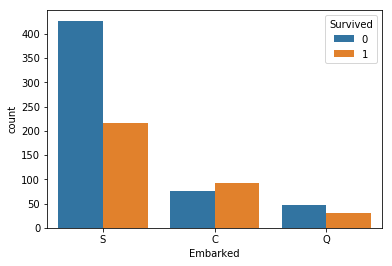

In [23]:
sns.countplot(train['Embarked'], hue=train['Survived'])

# Analyze missing values

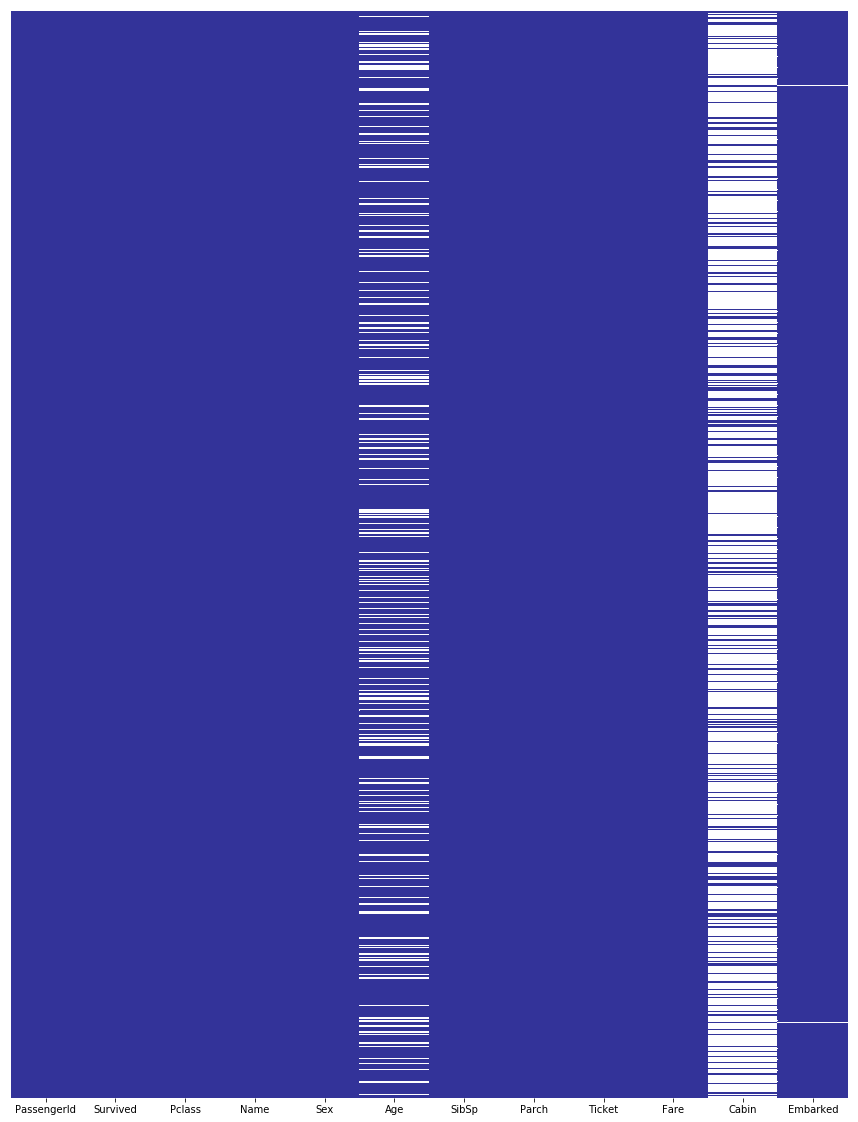

In [24]:
plt.figure(figsize=(15, 20))
sns.heatmap(train.isnull(), cbar=False, yticklabels=False, cmap='terrain')

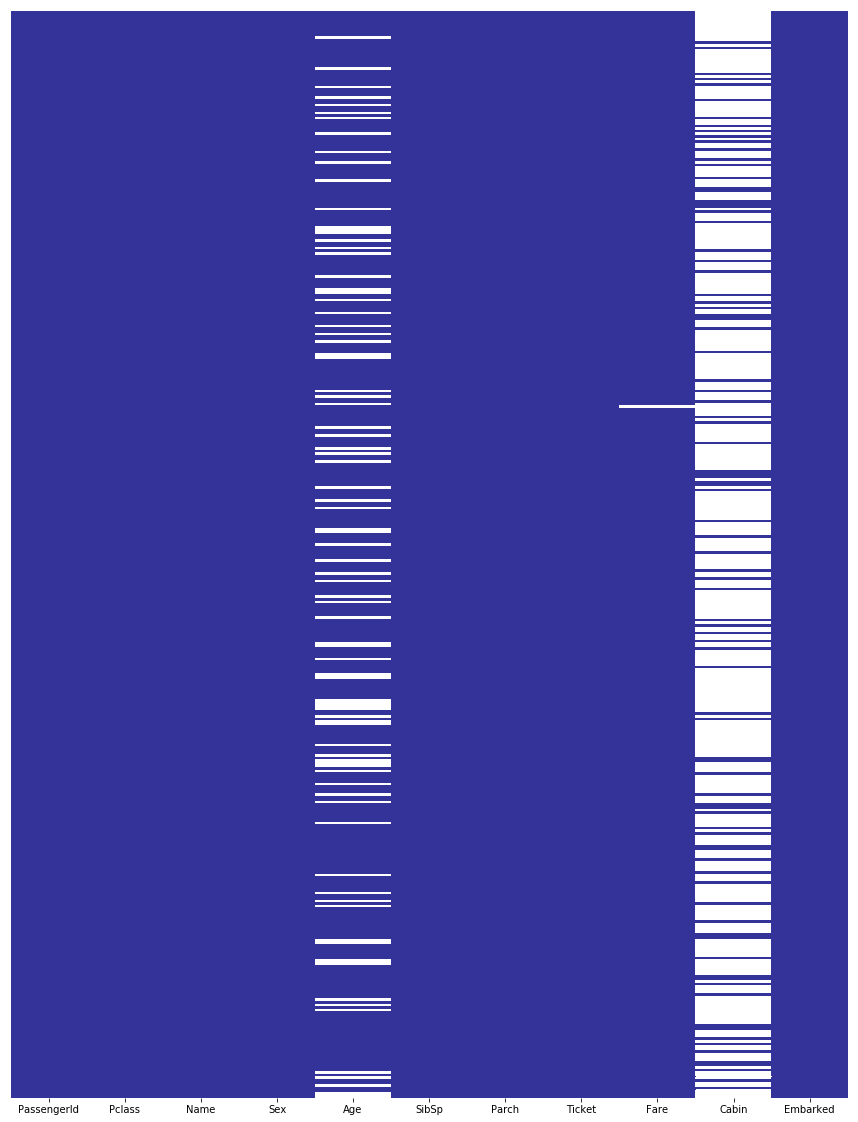

In [25]:
plt.figure(figsize=(15, 20))
sns.heatmap(test.isnull(), cbar=False, yticklabels=False, cmap='terrain')

In [26]:
# we can drop records from training set that have null values, but not from testing set, so handling individually
train = train[train['Embarked'].notnull()]

In [27]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [28]:
# cabin is missing too many values to impute, we can simply delete it later (after combining with test set)
# age can be imputed, but it is missing value in testing set as well, so combine both sets before processing

# Combine data from preprocessing

In [29]:
# add additional attribute so we can separate two datasets later
train['dataset'] = 'train'
test['dataset'] = 'test'
data = pd.concat([train, test])
data.sample(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,dataset
168,NaN,NaN,S,25.9250,"Baumann, Mr. John D",0,169,1,male,0,0.0,PC 17318,train
631,51.0,NaN,S,7.0542,"Lundahl, Mr. Johan Svensson",0,632,3,male,0,0.0,347743,train
461,34.0,NaN,S,8.0500,"Morley, Mr. William",0,462,3,male,0,0.0,364506,train
844,17.0,NaN,S,8.6625,"Culumovic, Mr. Jeso",0,845,3,male,0,0.0,315090,train
295,26.0,NaN,S,7.8958,"Angheloff, Mr. Minko",0,1187,3,male,0,NaN,349202,test


In [30]:
data.isnull().sum()

Age             263
Cabin          1014
Embarked          0
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dataset           0
dtype: int64

# Extract titles from names

In [31]:
data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
data.drop('Name', axis=1, inplace=True)

In [32]:
data.sample(5)

,Age,Cabin,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,dataset,Title
561,40.0,NaN,S,7.8958,0,562,3,male,0,0.0,349251,train,Mr
394,29.0,NaN,S,22.0250,1,1286,3,male,3,NaN,315153,test,Mr
842,30.0,NaN,C,31.0000,0,843,1,female,0,1.0,113798,train,Miss
290,26.0,NaN,S,78.8500,0,291,1,female,0,1.0,19877,train,Miss
319,22.0,NaN,S,31.5000,0,1211,2,male,2,NaN,C.A. 31029,test,Mr


In [33]:
title_freq = data['Title'].value_counts()
data['Title'] = data['Title'].apply(lambda x: x if title_freq[x] > 5 else 'Other')

In [34]:
data['entry'] = 1
pd.pivot_table(data, values='entry', index='Title', columns='Survived', aggfunc=np.sum)

Survived,0.0,1.0
Title,,
Dr,4.0,3.0
Master,17.0,23.0
Miss,55.0,126.0
Mr,436.0,81.0
Mrs,26.0,98.0
Other,5.0,9.0
Rev,6.0,NaN


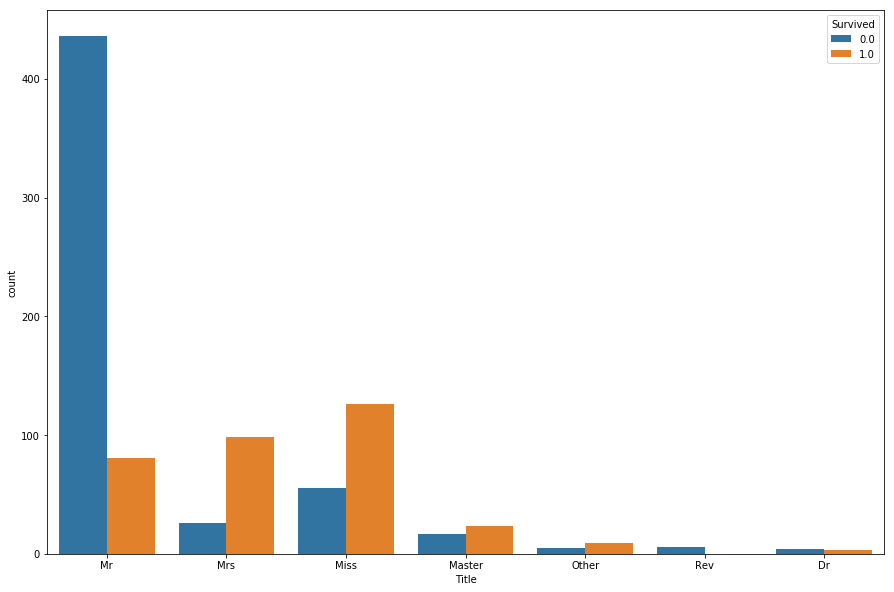

In [35]:
plt.figure(figsize=(15, 10))
sns.countplot(data['Title'], hue=data['Survived'])

# Check if age is co-related with any other parameters

In [36]:
age = train[train['Age'].notnull()]

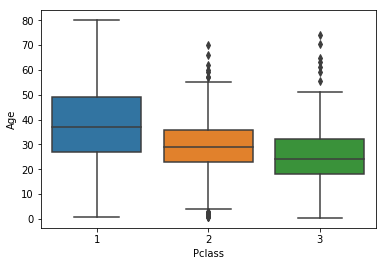

In [37]:
sns.boxplot(x='Pclass', y='Age', data=age)

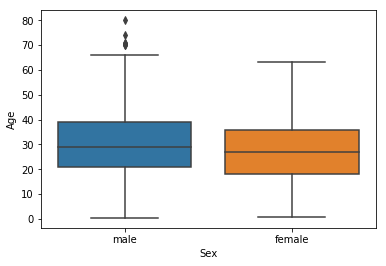

In [38]:
sns.boxplot(x='Sex', y='Age', data=age)

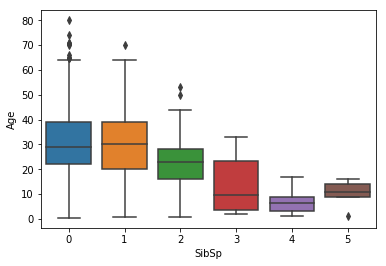

In [39]:
sns.boxplot(x='SibSp', y='Age', data=age)

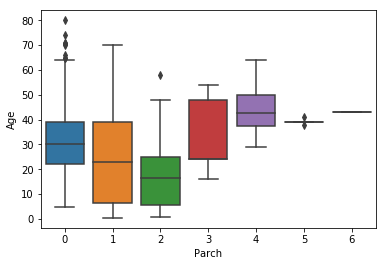

In [40]:
sns.boxplot(x='Parch', y='Age', data=age)

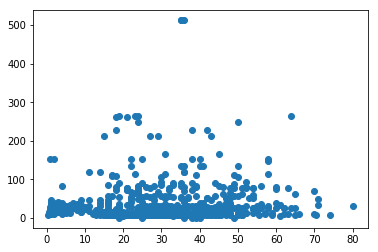

In [41]:
plt.scatter(age['Age'], age['Fare'])

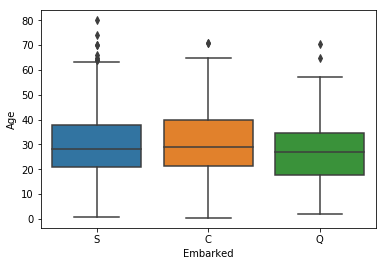

In [42]:
sns.boxplot(x='Embarked', y='Age', data=age)

In [43]:
data.groupby('Title')['Age'].agg(['count', 'mean'])

,count,mean
Title,,
Dr,7,43.571429
Master,53,5.482642
Miss,209,21.696603
Mr,581,32.252151
Mrs,169,36.846154
Other,17,42.941176
Rev,8,41.250000


In [44]:
data.groupby(['Title', 'Pclass'])['Age'].agg(['count', 'mean'])

count       mean
Title  Pclass                  
Dr     1           5  45.600000
       2           2  38.500000
Master 1           5   6.984000
       2          11   2.757273
       3          37   6.090000
Miss   1          58  30.206897
       2          48  20.717083
       3         103  17.360874
Mr     1         132  41.450758
       2         137  32.346715
       3         312  28.318910
Mrs    1          66  42.924242
       2          54  33.518519
       3          49  32.326531
Other  1          16  43.875000
       2           1  28.000000
       3           0        NaN
Rev    2           8  41.250000

In [45]:
# Impute missing age values using Pclass
# avg_age_by_class = data.groupby('Pclass')['Age'].mean()
# avg_age_by_class

# null_age = data['Age'].isnull()
# data.loc[null_age, 'Age'] = data[null_age]['Pclass'].apply(lambda x: avg_age_by_class[x])

In [46]:
# Impute missing age value using title
avg_age_by_title = data.groupby('Title')['Age'].mean()

null_age = data['Age'].isnull()
data.loc[null_age, 'Age'] = data[null_age]['Title'].apply(lambda x: avg_age_by_title[x])

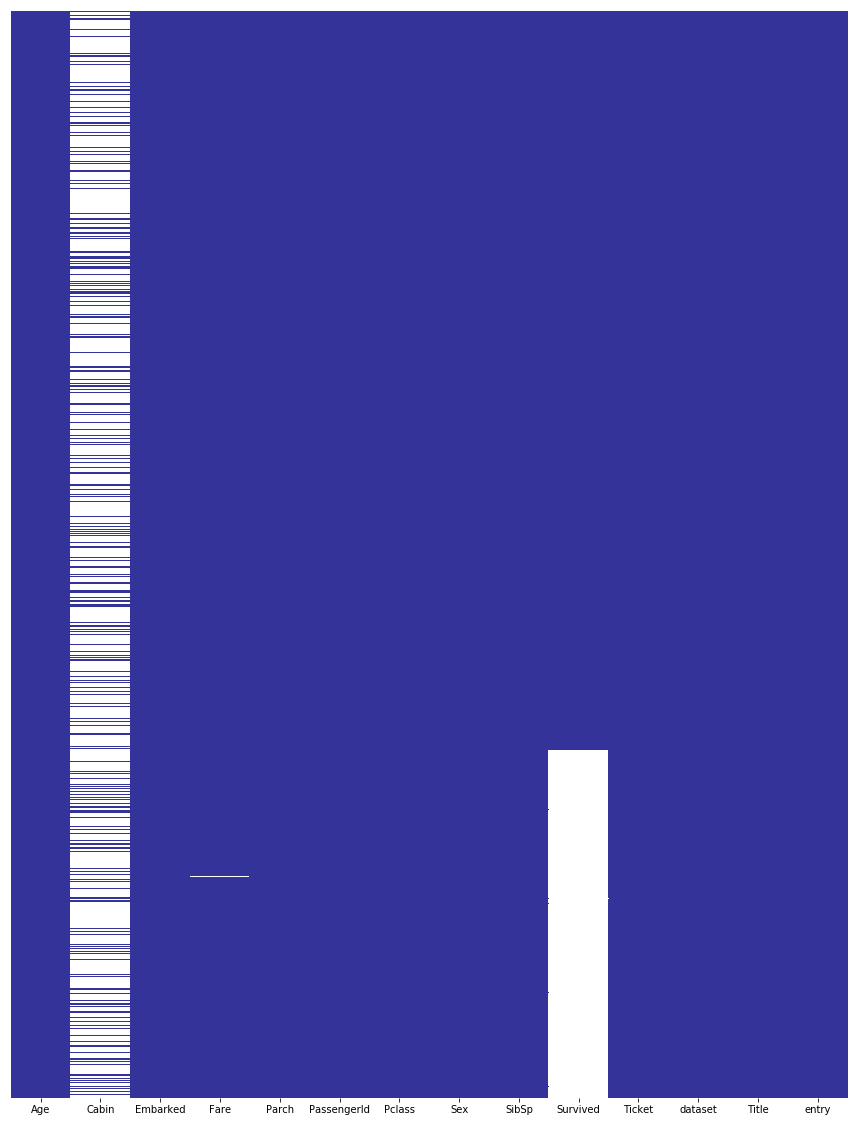

In [47]:
plt.figure(figsize=(15, 20))
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='terrain')

In [48]:
# drop useless columns
data.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

In [49]:
data.isnull().sum()

Age              0
Embarked         0
Fare             1
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dataset          0
Title            0
entry            0
dtype: int64

In [50]:
# fill missing values in testing set
data[data['Fare'].isnull()]

,Age,Embarked,Fare,Parch,PassengerId,Pclass,Sex,SibSp,Survived,dataset,Title,entry
152,60.5,S,NaN,0,1044,3,male,0,NaN,test,Mr,1


In [51]:
data.groupby(['Pclass', 'Embarked'])['Fare'].mean()

Pclass  Embarked
1       C           106.845330
        Q            90.000000
        S            72.148094
2       C            23.300593
        Q            11.735114
        S            21.206921
3       C            11.021624
        Q            10.390820
        S            14.435422
Name: Fare, dtype: float64

In [52]:
data.loc[data['Fare'].isnull(), 'Fare'] = 14.644083

In [53]:
data.isnull().sum()

Age              0
Embarked         0
Fare             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived       418
dataset          0
Title            0
entry            0
dtype: int64

# Convert categorical features into dummy variables

In [54]:
for col_name in ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked', 'Title']:
    col = pd.get_dummies(data[col_name], drop_first=True, prefix=col_name)
    data = pd.concat([data, col], axis=1)
    data.drop(col_name, axis=1, inplace=True)

In [55]:
data.head()

,Age,Fare,PassengerId,Survived,dataset,entry,Pclass_2,Pclass_3,Sex_male,SibSp_1,...,Parch_6,Parch_9,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,22.0,7.2500,1,0.0,train,1,0,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,38.0,71.2833,2,1.0,train,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,26.0,7.9250,3,1.0,train,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,35.0,53.1000,4,1.0,train,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,35.0,8.0500,5,0.0,train,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0


In [56]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
for col in ['Age', 'Fare']:
    scaled = scalar.fit_transform(data[[col]])
    data[col] = scaled

In [57]:
data.head()

,Age,Fare,PassengerId,Survived,dataset,entry,Pclass_2,Pclass_3,Sex_male,SibSp_1,...,Parch_6,Parch_9,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Other,Title_Rev
0,-0.597593,-0.501842,1,0.0,train,1,0,1,1,1,...,0,0,0,1,0,0,1,0,0,0
1,0.617099,0.736021,2,1.0,train,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,-0.293920,-0.488793,3,1.0,train,1,0,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,0.389344,0.384510,4,1.0,train,1,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,0.389344,-0.486377,5,0.0,train,1,0,1,1,0,...,0,0,0,1,0,0,1,0,0,0


In [58]:
X = data[data['dataset']=='train'].drop(['PassengerId', 'Survived', 'dataset'], axis=1)
y = data[data['dataset']=='train']['Survived']

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

# Machine Learning

In [60]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

## Cross validation

In [61]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [62]:
X = data[data['dataset']=='train'].drop(['PassengerId', 'Survived', 'dataset'], axis=1)
y = data[data['dataset']=='train']['Survived']

## kNN

In [63]:
clf = KNeighborsClassifier(n_neighbors=3)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print('avg score =', np.mean(score))

[0.73033708 0.74157303 0.85393258 0.7752809  0.84269663 0.78651685
 0.83146067 0.78651685 0.83146067 0.80681818]
avg score = 0.7986593462717058


## Decision tree

In [64]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print('avg score =', np.mean(score))

[0.75280899 0.73033708 0.80898876 0.76404494 0.79775281 0.84269663
 0.84269663 0.69662921 0.80898876 0.81818182]
avg score = 0.7863125638406537


## Random forest

In [65]:
clf = RandomForestClassifier(n_estimators=12)
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print('avg score =', np.mean(score))

[0.7752809  0.74157303 0.86516854 0.7752809  0.84269663 0.80898876
 0.84269663 0.70786517 0.79775281 0.85227273]
avg score = 0.8009576098059243


## Naive bayes

In [66]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print('avg score =', np.mean(score))

[0.43820225 0.4494382  0.41573034 0.34831461 0.35955056 0.40449438
 0.38202247 0.42696629 0.42696629 0.46590909]
avg score = 0.4117594484167518


## SVM

In [67]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print('avg score =', np.mean(score))

[0.73033708 0.75280899 0.91011236 0.7752809  0.87640449 0.7752809
 0.86516854 0.7752809  0.76404494 0.86363636]
avg score = 0.808835546475996


## SVM grid search

In [68]:
param_grid = {'C': [0.01, 0.1,1, 5, 10, 50, 100, 200, 500, 1000, 1200, 1500, 2000], 'gamma': [100, 50, 20, 10, 1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
clf = GridSearchCV(SVC(), param_grid, refit=True, verbose=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 5, 'gamma': 0.1, 'kernel': 'rbf'}
0.8302521008403362


## Logistic Regression

In [69]:
clf = LogisticRegression()
scoring = 'accuracy'
score = cross_val_score(clf, X, y, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print('avg score =', np.mean(score))

[0.70786517 0.76404494 0.8988764  0.79775281 0.87640449 0.78651685
 0.86516854 0.7752809  0.80898876 0.875     ]
avg score = 0.8155898876404495


## Logistic Regerssion grid search

In [70]:
param_grid = {'C': [0.01, 0.1,1, 5, 10, 50, 100, 200, 500, 1000, 1200, 1500, 2000], 'tol':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]} 
clf = GridSearchCV(LogisticRegression(), param_grid, refit=True, verbose=0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
print(clf.best_params_)
print(clf.best_score_)

{'C': 5, 'tol': 0.1}
0.8184873949579832


## Testing

In [71]:
clf = LogisticRegression(C=5, tol=0.1)
clf.fit(X, y)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.1,
          verbose=0, warm_start=False)

In [72]:
X_test = data[data['dataset']=='test'].drop(['PassengerId', 'Survived', 'dataset'], axis=1)

In [73]:
predictions = clf.predict(X_test).astype(int)

In [74]:
submission = pd.DataFrame({
    'PassengerId': data[data['dataset']=='test']['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)

In [75]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
